In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
Close = pd.read_csv('Close.csv', index_col = 0)

In [6]:
Close.head()

,iba,wpz,flic,ncs,gpk,wti,mygn,kelya,nycb,elp,...,asx,faro,awk,chn,omex,roic,nbl,atu,xco,apf
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.225,22.355,9.3094,10.20,3.4959,9.955,26.66,11.898,9.4832,16.594,...,2.9896,21.90,19.270,12.832,17.76,7.7942,33.864,18.690,303.66,12.231
2010-01-05,20.858,22.589,9.1551,10.25,3.4577,10.022,26.57,11.954,9.5110,16.765,...,3.0673,20.91,19.466,13.234,17.88,7.8400,34.744,18.780,301.20,12.305
2010-01-06,20.612,22.637,9.0008,10.05,3.3339,10.217,26.92,11.594,9.5150,16.779,...,3.0390,20.80,19.570,13.442,16.68,7.8477,35.070,18.890,302.01,12.395
2010-01-07,20.683,22.269,9.0205,10.40,3.5341,10.115,26.50,11.695,9.7720,16.454,...,3.2582,21.65,19.613,13.120,17.52,7.8707,34.599,19.175,292.72,12.345
2010-01-08,21.085,22.192,8.9584,11.35,3.4197,10.149,26.19,11.485,9.8060,16.779,...,3.2016,21.25,19.570,13.106,17.52,7.8785,34.813,19.474,296.55,12.435


In [7]:
Close.shape

(1256, 2436)

## Доходности

In [8]:
returns = (Close - Close.shift(1))/Close.shift(1)

## Альфа

In [6]:
def alpha_func(Close):
    
    #Q = np.array((Close.shift(2)-Close.shift(3))/Close.shift(3)) # пример momentum-стратегии 
    #Q = np.array((Close.shift(3)-Close.shift(2))/Close.shift(2)) # пример reversion-стратегии 
    Q_mean = np.array([Q.mean(axis=1)]*Close.shape[1]).T
    chislitel = Q - Q_mean
    znamenatel = np.array([np.linalg.norm(chislitel, axis = 1, ord = 1)]*Close.shape[1]).T
    alpha = pd.DataFrame(chislitel/znamenatel)
    alpha.columns = Close.columns
    alpha.index = Close.index
    
    return alpha

In [7]:
alpha = alpha_func(Close)

In [8]:
def decay(alpha, n):
    ## код операции decay с циклом
    

    return result

In [9]:
#alpha = decay(alpha, n = )

## Кумулятивный PnL

In [10]:
result = returns*alpha.shift(1)

In [11]:
PnL = pd.DataFrame(np.sum(result, axis = 1))

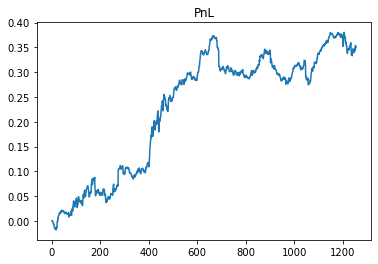

In [12]:
plt.plot(PnL.values.cumsum())
plt.title('PnL')
plt.show()

# ПОКАЗАТЕЛИ ПО ГОДАМ

In [13]:
# Создаем колонку с годом для последующего фильтра

Close.reset_index(inplace=True)
Close['year'] = Close.Date.apply(lambda x: pd.to_datetime(x).year)

In [14]:
# Цикл, чтобы вывести индексы

years = [2010, 2011, 2012, 2013, 2014]
for y in years:
    print(y, '\n'
          'Start-индекс:', Close[Close.year == y].index[0], '\n'
          'End-индекс:', Close[Close.year == y].index[-1] + 1, '\n'
         '*******************')

2010 
Start-индекс: 0 
End-индекс: 252 
*******************
2011 
Start-индекс: 252 
End-индекс: 503 
*******************
2012 
Start-индекс: 503 
End-индекс: 753 
*******************
2013 
Start-индекс: 753 
End-индекс: 1005 
*******************
2014 
Start-индекс: 1005 
End-индекс: 1256 
*******************


* __Turnover__

In [15]:
turnover_2010 = np.mean(np.sum(np.abs(alpha.iloc[0:252] - alpha.iloc[0:252].shift(1)), axis=1)*100)
turnover_2010

143.09090600286993

* __Sharpe__

In [16]:
PnL_2010 = PnL.iloc[0:252]
sharpe_2010 = np.mean(PnL_2010)/np.std(PnL_2010)
sharpe_2010 = sharpe_2010[0]*np.sqrt(252)
sharpe_2010

0.82182396341894

* __PnL Returns__

In [17]:
# Цикл, чтобы вывести индексы

years = [2010, 2011, 2012, 2013, 2014]
for y in years:
    print(y, '\n'
          'Start-индекс:', Close[Close.year == y].index[0], '\n'
          'End-индекс:', Close[Close.year == y].index[-1] , '\n'
         '*******************')

2010 
Start-индекс: 0 
End-индекс: 251 
*******************
2011 
Start-индекс: 252 
End-индекс: 502 
*******************
2012 
Start-индекс: 503 
End-индекс: 752 
*******************
2013 
Start-индекс: 753 
End-индекс: 1004 
*******************
2014 
Start-индекс: 1005 
End-индекс: 1255 
*******************


In [18]:
PnL_cumsum = pd.DataFrame(PnL.values.cumsum())
PnL_cumsum.index = PnL.index

In [19]:
PnL_2010 = PnL_cumsum.iloc[251,0]-PnL_cumsum.iloc[0,0]
PnL_2010

0.05213839696838555

In [20]:
PnL_2011 = PnL_cumsum.iloc[502,0]-PnL_cumsum.iloc[252,0]
PnL_2011

0.18687678500126215